In [1]:
import matplotlib.pyplot as plt
import numpy as np
import run_continuum as run

def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))

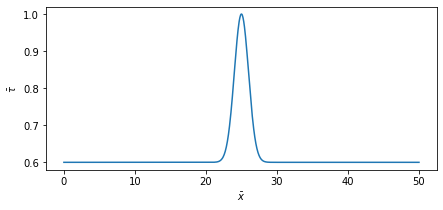

In [2]:
# Set up and plot prestress distribution
x = np.linspace(0,50,1000)
tau = gauss(x,np.max(x)/2,1)*0.4 + 0.6
tau = tau/np.max(tau) # Make sure tau reaches 1, which is needed for t

plt.figure(figsize=(7,3))
plt.plot(x,tau)
plt.xlabel('$\\bar x$')
plt.ylabel('$\\bar \\tau$')
plt.show()

In [3]:
# Run simulation with gamma = 0.65
data = run.run_continuum(x = x, 
                         tau = tau, 
                         tau_minus = tau+2, 
                         dt = 1e-3, 
                         output_interval = 100,
                         gamma = 0.65,
                         tmax = 15, 
                         beta = 0.01)

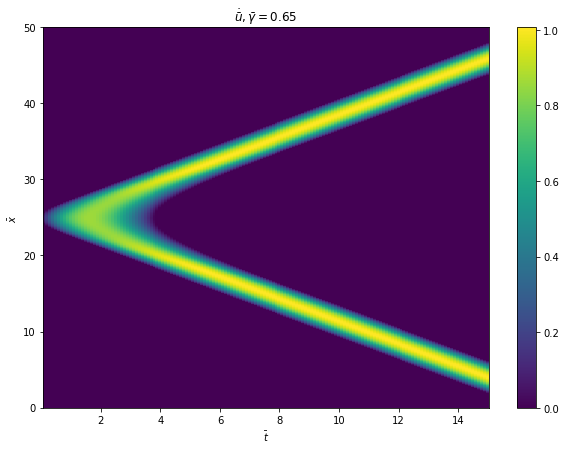

In [4]:
# Plot
plt.figure(figsize=(10,7))
plt.pcolor(data['t'],x,data['v'],shading='auto')
plt.xlabel('$\\bar t$')
plt.ylabel('$\\bar x$')
plt.title('$\\dot \\bar u, \\bar \gamma = 0.65$')
plt.colorbar()

plt.show()

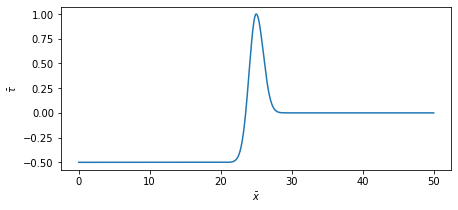

In [5]:
# Set up new prestress distribution that is not symmetric (and reaches 0):
x = np.linspace(0,50,1000)
tau = np.zeros(np.size(x))
tau[501:] = gauss(x[501:],np.max(x)/2,1)*1 + 0
tau[0:501] = gauss(x[0:501],np.max(x)/2,1)*1.5 - 0.5
tau = tau/np.max(tau) # Make sure tau reaches 1, which is needed for t

plt.figure(figsize=(7,3))
plt.plot(x,tau)
plt.xlabel('$\\bar x$')
plt.ylabel('$\\bar \\tau$')
plt.show()

In [10]:
# Run the same simulation with gamma = 0
data = run.run_continuum(x = x, 
                         tau = tau, 
                         tau_minus = tau+2, 
                         dt = 1e-3, 
                         output_interval = 100,
                         gamma = 0,
                         tmax = 25, 
                         beta = 0.01)

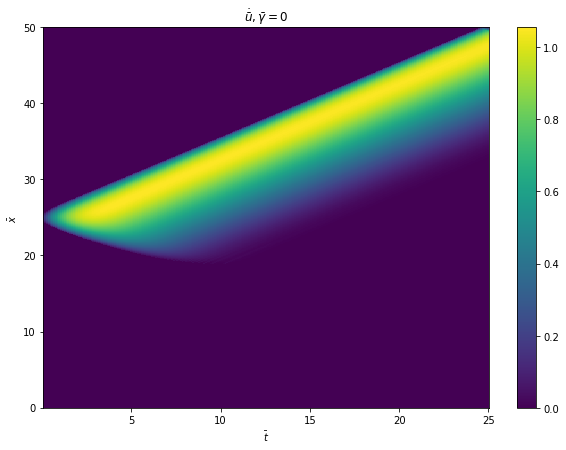

In [11]:
# Plot
plt.figure(figsize=(10,7))
plt.pcolor(data['t'],x,data['v'],shading='auto')
plt.xlabel('$\\bar t$')
plt.ylabel('$\\bar x$')
plt.title('$\\dot \\bar u, \\bar \gamma = 0$')
plt.colorbar()

plt.show()